# Kaggle Project 14 - Regression with a Tabular Concrete Strength Data

## Prepared by: Dwaipayan Mukherjee (2211569, AIA - AIML)

## About the Project:

There Various Factors that affects the Strength of Concrete Such as Materials Used, Age etc.The dataset for this competition (both train and test) was generated from a deep learning model trained on the Concrete Strength Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.

**Problem Statement:** Our aim here is to predict the Strength of the Concrete Based on the Components and Other Factors as Predictors.

**Description of Fields are as follows:-**

`CementComponent`:- Amount of cement is mixed

`BlastFurnaceSlag`:- Amount of Blast Furnace Slag is mixed

`FlyAshComponent`:- Amount of FlyAsh is mixed

`WaterComponent`:- Amount of water is mixed

`SuperplasticizerComponent`:- Amount of Super plasticizer is mixed

`CoarseAggregateComponent`:- Amount of Coarse Aggregate is mixed

`FineAggregateComponent`:- Amount of Fine Aggregate is mixed

`AgeInDays`:- How many days it was left dry

`Strength`:- What was the final strength of concrete- (**Target**)

 

## Necessary Imports:


First we import the necessary libraries without which we won't be able to work. The `Pandas` module is imported to provide powerful and efficient data manipulation and analysis capabilities. The `NumPy` module is imported for efficient numerical computing and array operations. The `matplotlib` and `seaborn` are visualization libraries, which are imported. Lastly, the `datetime` module allows us to work efficiently with dates and times.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

The next set of imports are as follows:

• `import lightgbm, math, itertools` - This line of code imports three different modules: lightgbm, which is a gradient boosting framework that uses tree-based learning algorithms; math, which is a built-in Python module that provides mathematical functions; and itertools, which is a built-in Python module that provides functions for working with iterators. This line of code is necessary to use functions from these modules in the subsequent code.

• `from matplotlib.ticker import MaxNLocator` - This line of code imports the MaxNLocator class from the Matplotlib.ticker module. MaxNLocator is a utility class used to determine the number and placement of ticks on an axis. This line of code is necessary to use the MaxNLocator class in the subsequent code.

• `from sklearn.base import BaseEstimator, TransformerMixin` - This line of code imports the BaseEstimator and TransformerMixin classes from the sklearn.base module. These classes are used as base classes for creating custom transformers and estimators in a scikit-learn pipeline. This line of code is necessary to use the BaseEstimator and TransformerMixin classes in the subsequent code.

• `from sklearn.model_selection import KFold, GroupKFold` - This line of code imports the KFold and GroupKFold classes from the sklearn.model_selection module. KFold is a class used to split a dataset into k consecutive folds (or partitions), while GroupKFold is a class used to split a dataset into k consecutive folds while preserving groups of samples. This line of code is necessary to use the KFold and GroupKFold classes in the subsequent code.

• `from sklearn.pipeline import make_pipeline, Pipeline` - This line of code imports the make_pipeline and Pipeline classes from the sklearn.pipeline module. These classes are used to create pipelines, which are a series of data processing steps that are chained together to form a complete workflow. This line of code is necessary to use the make_pipeline and Pipeline classes in the subsequent code.

• `from sklearn.compose import ColumnTransformer` - This line of code imports the ColumnTransformer class from the sklearn.compose module. ColumnTransformer is a class used to apply different transformers to different columns of a dataset. This line of code is necessary to use the ColumnTransformer class in the subsequent code.

• `from sklearn.preprocessing import StandardScaler` - This line of code imports the StandardScaler class from the sklearn.preprocessing module. StandardScaler is a class used to standardize numerical features by removing the mean and scaling to unit variance. This line of code is necessary to use the StandardScaler class in the subsequent code.

• `from sklearn.ensemble import RandomForestRegressor, VotingRegressor` - This line of code imports the RandomForestRegressor and VotingRegressor classes from the sklearn.ensemble module. RandomForestRegressor is a class used to fit a random forest regression model, while VotingRegressor is a class used to fit an ensemble of regression models. This line of code is necessary to use the RandomForestRegressor and VotingRegressor classes in the subsequent code.

• `from sklearn.linear_model import Ridge, RidgeCV` - This line of code imports the Ridge and RidgeCV classes from the sklearn.linear_model module. Ridge is a class used to fit a linear regression model with L2 regularization, while RidgeCV is a class used to fit a linear regression model with L2 regularization and perform cross-validation to select the optimal regularization parameter. This line of code is necessary to use the Ridge and RidgeCV classes in the subsequent code.

• `from sklearn.ensemble import GradientBoostingRegressor` - This line of code imports the GradientBoostingRegressor class from the sklearn.ensemble module. GradientBoostingRegressor is a class used to fit a gradient boosting regression model. This line of code is necessary to use the GradientBoostingRegressor class in the subsequent code.

• `from sklearn.metrics import mean_squared_error` - This line of code imports the mean_squared_error function from the sklearn.metrics module. mean_squared_error is a function used to compute the mean squared error between two arrays. This line of code is necessary to use the mean_squared_error function in the subsequent code.

• `import sklearn.gaussian_process.kernels as kernels` - This line of code imports the kernels module from the sklearn.gaussian_process.kernels package and assigns it an alias of "kernels". This line of code is necessary to use the kernels module in the subsequent code.

• `from sklearn.gaussian_process import GaussianProcessRegressor` - This line of code imports the GaussianProcessRegressor class from the sklearn.gaussian_process module. GaussianProcessRegressor is a class used to fit a Gaussian process regression model. This line of code is necessary to use the GaussianProcessRegressor class in the subsequent code.

• `from sklearn.inspection import PartialDependenceDisplay` - This line of code imports the PartialDependenceDisplay class from the sklearn.inspection module. PartialDependenceDisplay is a class used to visualize the partial dependence of a target variable on a set of features. This line of code is necessary to use the PartialDependenceDisplay class in the subsequent code.

In [2]:
import lightgbm, math, itertools
from matplotlib.ticker import MaxNLocator

## Sci-kit learn module based imports:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold, GroupKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import sklearn.gaussian_process.kernels as kernels
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.inspection import PartialDependenceDisplay

The `np.set_printoptions()` function is used to set various options for how NumPy arrays are displayed when printed. The `linewidth` parameter specifies the maximum number of characters allowed per line when printing arrays. The `edgeitems` parameter specifies the number of array elements to display at the beginning and end of each dimension when the array is too large to be displayed.

By using the below code, I am adjusting these settings to increase the maximum line width to 150 characters and display upto 5 elements at the edges of each dimension before truncation occurs.

In [3]:
np.set_printoptions(linewidth=150, edgeitems=5)
result_list = []

## Loading the datasets as Pandas dataframes:

We load the training, testing and sample submission datasets as Pandas dataframes to work on them. The `read_csv()` method of Pandas allows us to load any cav file as a Pandas Dataframe. The argument `index_col` allows us to use a specific column in the data as the index column. 

In [4]:
train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')

Just checking out the first 5 rows of the two datasets:

In [5]:
train.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
id,,,,,,,,,
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [6]:
test.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
id,,,,,,,,
5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28


Loading the sample submission data as well:

In [7]:
submission = pd.read_csv('sample_submission.csv', index_col = 'id')
submission.head()

,Strength
id,
5407,35.452
5408,35.452
5409,35.452
5410,35.452
5411,35.452


## Understanding the data:

The first job in any data science project is to understand the nature of the data. This includes understanding the dimensions of the data, presence of null/missing values in the data and looking for duplicates.

First we will see the features and target of the dataset.

In [8]:
target = 'Strength'
original_features = list(test.columns)

In [9]:
original_features

['CementComponent',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays']

Next we look at the length of the train and test data. The `len()` method allows us to find the lengths. 

In [10]:
print(f"Length of train: {len(train)}")
print(f"Length of test:  {len(test)}")

Length of train: 5407
Length of test:  3605


Next we look for null/missing values in the data. The `isna()` method finds whether there are any null values or not.

In [11]:
temp1 = train.isna().sum().sum()
temp2 = test.isna().sum().sum()
if temp1 == 0 and temp2 == 0:
    print('There are no null values in train and test.')
else:
    print(f'There are {temp1} null values in train')
    print(f'There are {temp2} null values in train')
print()

There are no null values in train and test.



## Exploratory Data Analysis:

The next important task for a Data Science problem is to perform Exploratory Data Analysis, where we visualize the patterns in the data using visualization tools.

We will look at two things over here specifically:
1. Distributions of each of the columns.
2. Correlations.

### Distributions:

For the EDA on the distributions of each column, I have defined a function. The code goes as follows:

- The first line defines a function named "analyze" which takes four arguments: train, test, col, and ax.
- The docstring (the triple quoted text) provides a brief explanation of what the function does, which is plotting a histogram for a specific column into a specific axis.
- The "bins" variable is assigned a value of 40, which determines the number of bins in the histogram.
- The "column" variable is assigned the values of the "col" column in the "train" DataFrame.
- The "if" statement checks if the "col" column is also present in the "test" DataFrame. If it is, then it combines the values of both "train" and "test" columns into the "both" variable using the NumPy "hstack" function. If not, then it assigns the "column" variable to the "both" variable.
- The "uni" variable uses the NumPy "unique" function to find the unique values of the "column" variable.
- The "unival" variable is assigned the length of the "uni" variable, which is the number of unique values in the "column" variable.
- The next "if" statement checks if the number of unique values is less than the "bins" variable. If it is, then it calculates the value counts of the "column" variable in the "train" DataFrame and normalizes it by the length of the "train" DataFrame. If the "col" column is also present in the "test" DataFrame, then it calculates the value counts of the "test" column and normalizes it by the length of the "test" DataFrame. It then plots the normalized value counts as a bar plot using the Matplotlib "bar" function with a width of 6, an alpha of 0.5, and a label for each dataset. If the number of unique values is less than or equal to 12, then it sets the x-ticks of the axis to the unique values. Otherwise, it sets the x-ticks to integer values only using the Matplotlib "MaxNLocator" function. It then sets the x-label as the column name with the word "target" in parentheses if the column name is equal to the "target" variable, and sets the y-label as "density". Finally, it adds a legend to the axis.
- If the number of unique values is greater than or equal to the "bins" variable, then it calculates the histogram bins using the NumPy "linspace" function with the minimum and maximum values of the "both" variable and the number of bins. It then plots the histogram of the "column" variable using the Matplotlib "hist" function with the calculated bins, a density of True, an alpha of 0.5, and a label for the "train" dataset. If the "col" column is also present in the "test" DataFrame, then it plots the histogram of the "test" column using the same parameters. It then sets the x-label and y-label the same as the previous "if" statement and adds a legend to the axis.
- The next block of code creates a 3x3 grid of subplots using the Matplotlib "subplots" function with a figure size of 12x10. It then flattens the grid into a 1-dimensional array using the NumPy "ravel" function and assigns it to the "axs" variable.
- The "for" loop iterates over each column in the "train" DataFrame and its corresponding axis in the "axs" variable using the "zip" function. It then calls the "analyze" function with the current column, the "train" and "test" DataFrames, and the current axis and plots a histogram in the axis.
- The "tight_layout" function adjusts the padding between subplots, and the "show" function displays the plot.

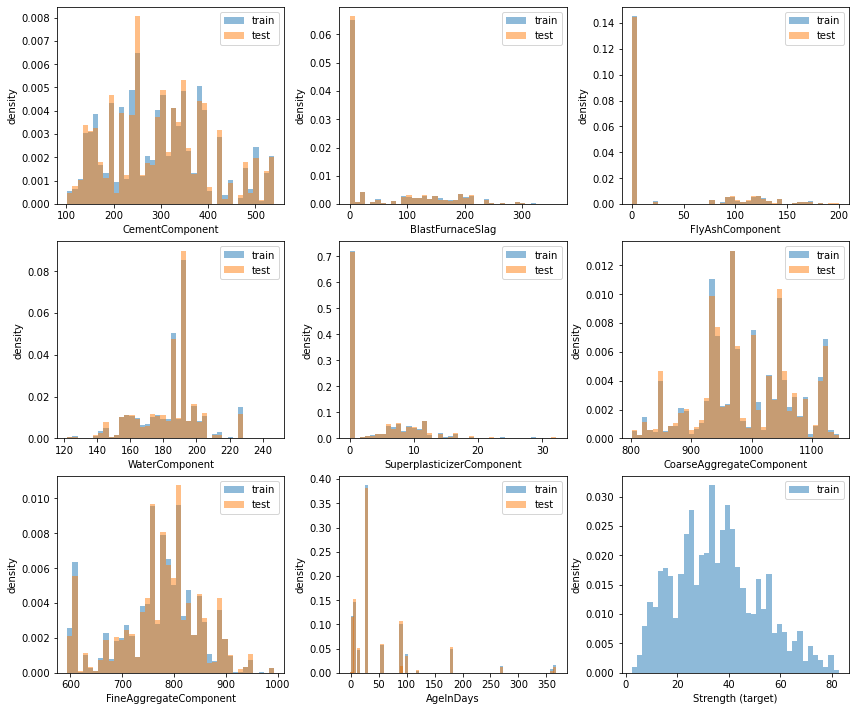

In [12]:
def analyze(train, test, col, ax):
    """Plot a histogram for column col into axes ax"""
    bins = 40
    column = train[col]
    if col in test.columns:
        both = np.hstack([column.values, test[col].values])
    else:
        both = column
    uni = np.unique(column)
    unival = len(uni)
    if unival < bins:
        vc_tr = column.value_counts().sort_index() / len(train)
        if col in test.columns:
            vc_te = test[col].value_counts().sort_index() / len(test)
            ax.bar(vc_tr.index, vc_tr, width=6, label='train', alpha=0.5)
            ax.bar(vc_te.index, vc_te, width=6, label='test', alpha=0.5)
        else:
            ax.bar(vc_tr.index, vc_tr, label='train', alpha=0.5)
        if unival <= 12:
            ax.set_xticks(vc_tr.index)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    else:
        hist_bins = np.linspace(both.min(), both.max(), bins+1)
        ax.hist(column, bins=hist_bins, density=True, label='train', alpha=0.5)
        if col in test.columns:
            ax.hist(test[col], bins=hist_bins, density=True, label='test', alpha=0.5)
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    
_, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.ravel()
for col, ax in zip(train.columns, axs):
    analyze(train, test, col, ax)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

We are able to draw some inferences from this EDA:
- All samples contain cement, water, coarse aggregate and fine aggregate.
- Only a part of the samples contains blast furnace, fly ash or superplasticizer. We might treat these three features as binary.
- Train and test distributions look similar.

We must note that 2140 of 5407 training samples contain neither blast furnace, fly ash nor superplasticizer:

In [13]:
train[(train.BlastFurnaceSlag == 0) & (train.FlyAshComponent == 0) & (train.SuperplasticizerComponent == 0)].shape

(2140, 9)

Again, the only feature with very few unique values is `AgeInDays` because measurements were typically taken after 3 days, 7 days, 2 weeks, 4 weeks, 8 weeks, 3 months, 6 months, 9 months or 1 year:

In [14]:
print('Value counts for AgeInDays')
pd.concat([train, test], axis=0).AgeInDays.value_counts().sort_index()

Value counts for AgeInDays


1         8
3      1053
7      1345
11        1
14      435
28     3474
49        1
56      526
90      922
91      124
100     334
120      36
180     454
270     116
360      52
365     131
Name: AgeInDays, dtype: int64

### Correlations

Correlations among features are nonnegligible: For instance, samples with a lot of superplasticizer typically contain fly ash as well, but little water.

The following code calculates the correlation matrix of the train dataset and creates a heatmap of the matrix using the Seaborn `heatmap()` function. The heatmap displays the correlations between each pair of columns in the dataset, with the color representing the strength and direction of the correlation.

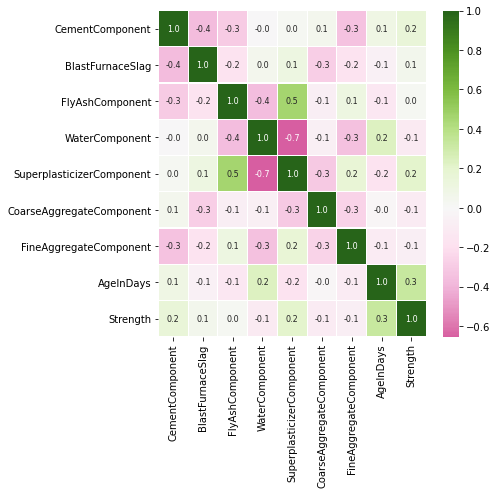

In [15]:
corr = train.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, linewidth=0.1, fmt='.1f', 
            annot=True, annot_kws={'size': 8}, 
            cmap='PiYG', center=0)
plt.show()

## Cross-validating and comparing several models:

This is the initial attempt to model. Here we try to find out which models work well and which features are important. This will help us to determine what models we would use for our final attempt to modelling the dataset and predicting the strength of concrete on the test data.

We first create a function to cross-validate for each model.

The following piece of code defines a function named `score_model` that performs cross-validation on a given model with a specified set of features. The function uses `KFold` splitting to divide the `train` dataset into training and validation sets and then fits the model on the training set and evaluates its performance on the validation set. It prints the `RMSE score` for each fold and the `average RMSE score` across all folds. If a label is provided, it appends the label, the average RMSE score, and the out-of-fold predictions to a global `result_list` variable.

The code is explained step-by-step:

- The first line of the code starts with "%%time", which is a Jupyter Notebook magic command that measures the execution time of the cell. This means that the function's execution time will be displayed after it completes.
- The "score_model" function takes three arguments: "model", which is the model to be evaluated; "features_used", which is a list of the features to be used for training and evaluation; and "label", which is an optional label that can be used to identify the results in the "result_list" variable.
- The function initializes an empty list called "score_list" to store the RMSE scores for each fold and an empty NumPy array called "oof" (out-of-fold) with the same shape as the target variable in the "train" dataset.
- It then initializes a KFold object with default parameters, which will be used to split the "train" dataset into training and validation sets for each fold.
- The function then enters a "for" loop that iterates over each fold of the KFold object. For each fold, it splits the "train" dataset into training and validation sets using the indices provided by the KFold object.
- It then extracts the training and validation features and labels from the "train" dataset using the indices and features provided by the arguments of the function.
- The function then fits the "model" on the training set and evaluates its performance on the validation set using the mean squared error (MSE) and the root mean squared error (RMSE).
- If the model is a pipeline that ends with a GaussianProcessRegressor, it prints the kernel used by the GaussianProcessRegressor.
- It then prints the RMSE score for the current fold and adds it to the "score_list" variable.
- It also stores the predictions made by the model on the validation set in the "oof" array using the indices of the validation set.
- After all folds have been processed, the function calculates the average RMSE score by taking the mean of the "score_list" variable and prints it.
- If a label is provided, the function appends the label, the average RMSE score, and the out-of-fold predictions to the global "result_list" variable.

In [16]:
%%time

def score_model(model, features_used, label=None):
    """Cross-validate a model with feature selection"""
    score_list = []
    oof = np.zeros_like(train[target])
    kf = KFold()
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train)):
        X_tr = train.iloc[idx_tr][features_used]
        X_va = train.iloc[idx_va][features_used]
        y_tr = train.iloc[idx_tr][target]
        y_va = train.iloc[idx_va][target]
        
        
        model.fit(X_tr, y_tr)
        trmse = mean_squared_error(y_tr, model.predict(X_tr), squared=False)
        y_va_pred = model.predict(X_va)
        rmse = mean_squared_error(y_va, y_va_pred, squared=False)
        if type(model) == Pipeline and type(model.steps[-1][1]) == GaussianProcessRegressor:
            print('Kernel:', model.steps[-1][1].kernel_)
        print(f"Fold {fold}: trmse = {trmse:.3f}   rmse = {rmse:.3f}")
        oof[idx_va] = y_va_pred
        score_list.append(rmse)

    rmse = sum(score_list) / len(score_list)
    print(f"Average rmse: {rmse:.3f}")
    if label is not None:
        global result_list
        result_list.append((label, rmse, oof))

Wall time: 0 ns


### Linear Baseline model:

We try out a Ridge model first.

The following code calls the `score_model()` function with a pipeline model that consists of a `StandardScaler` and a `Ridge` regression model with `alpha=70`, and the original set of features as the features to be used for training and evaluation. The function performs cross-validation on the model using the "train" dataset and prints the RMSE score for each fold and the average RMSE across all folds. It also appends the label, the average RMSE score, and the out-of-fold predictions to a global `result_list` variable.

Ridge regression on the original features gives an RMSE of 14.607.

In [17]:
score_model(model=make_pipeline(StandardScaler(), Ridge(70)),
            features_used=original_features)

Fold 0: trmse = 14.548   rmse = 14.684
Fold 1: trmse = 14.590   rmse = 14.536
Fold 2: trmse = 14.684   rmse = 14.125
Fold 3: trmse = 14.673   rmse = 14.199
Fold 4: trmse = 14.341   rmse = 15.492
Average rmse: 14.607


Adding indicators for the presence of the three optional components improves the RMSE only a little:

In the first step,
- The "for loop" is used to iterate over two data frames, "train" and "test".
- In each iteration, the loop performs the following actions on the current data frame:
    - It creates a new column called "hasBlastFurnaceSlag", which contains a boolean value indicating whether the value in the "BlastFurnaceSlag" column of the data frame is not equal to 0.
    - It creates a new column called "hasFlyAshComponent", which contains a boolean value indicating whether the value in the "FlyAshComponent" column of the data frame is not equal to 0.
    - It creates a new column called "hasSuperplasticizerComponent", which contains a boolean value indicating whether the value in the "SuperplasticizerComponent" column of the data frame is not equal to 0.
- This loop is useful for adding new columns to each data frame, which can be used as features in a machine learning model.

In the second step,
- The function "score_model" is called with two arguments: "model" and "features_used".
- The "model" argument is created using a pipeline of two functions:
    - StandardScaler()" scales the data by subtracting the mean and dividing by the standard deviation, which makes the data have a mean of 0 and a standard deviation of 1.
    - "Ridge(70)" is a linear regression model with regularization, where the regularization strength is set to 70. This helps prevent overfitting in the model.
- The "features_used" argument is set to "test.columns", which means that all the columns in the "test" data frame will be used as features in the model.
- The "score_model" function fits the model to the training data, predicts on the test data, and returns a score indicating how well the model performs on the test data. This score can be used to evaluate and improve the model.

In [18]:
for df in [train, test]:
    df['hasBlastFurnaceSlag'] = df.BlastFurnaceSlag != 0
    df['hasFlyAshComponent'] = df.FlyAshComponent != 0
    df['hasSuperplasticizerComponent'] = df.SuperplasticizerComponent != 0
    
score_model(model=make_pipeline(StandardScaler(), Ridge(70)),
            features_used=test.columns)

Fold 0: trmse = 14.474   rmse = 14.609
Fold 1: trmse = 14.509   rmse = 14.491
Fold 2: trmse = 14.607   rmse = 14.063
Fold 3: trmse = 14.603   rmse = 14.111
Fold 4: trmse = 14.264   rmse = 15.419
Average rmse: 14.539


### Random forests and partial dependency plots

A random forest is much better than the linear models and gives an RMSE of 12.129. We set `min_samples_leaf` to 30 so that the random forest doesn't overfit.

The provided code is calling the function `score_model()` with three arguments. The first argument `model` is an instance of the `RandomForestRegressor` model with `n_estimators=300`, `min_samples_leaf=30`, and `random_state=1` parameters. The second argument `features_used` is a variable containing a list of original features used for training the model. The third argument `label` is a string that represents the label for the model, which in this case is "Random Forest".

The `score_model()` function performs cross-validation of the given model with feature selection. It trains the model on a subset of the data and evaluates its performance on the remaining data using the mean squared error metric. The `features_used` parameter specifies the subset of features to be used for training the model. The `label` parameter is used to store the results of the cross-validation in a global `result_list` variable.

Overall, this code trains a random forest regression model with specified parameters and evaluates its performance using cross-validation.

In [19]:
score_model(model=RandomForestRegressor(n_estimators=300, min_samples_leaf=30, random_state=1),
            features_used=original_features,
            label='Random Forest')

Fold 0: trmse = 11.588   rmse = 11.834
Fold 1: trmse = 11.478   rmse = 12.144
Fold 2: trmse = 11.558   rmse = 11.872
Fold 3: trmse = 11.552   rmse = 11.907
Fold 4: trmse = 11.326   rmse = 12.891
Average rmse: 12.129


**Partial Dependency Plot:**

The following code first imports the `plot_partial_dependence` function from the `sklearn.inspection` module. It then creates an instance of the `RandomForestRegressor` model with `n_estimators=300`, `min_samples_leaf=30`, and `random_state=1` parameters and trains it on the `train` dataset using the `original_features` as the predictors and `target` as the target variable.

Next, the code initializes the `features_for_pdp` variable with the `original_features` list and creates a 2x4 subplot figure with a total size of `(12, 5)` for plotting partial dependence plots. The `plot_partial_dependence` function is then called to generate the partial dependence plots for each feature in `features_for_pdp` using the trained model. The `n_jobs` parameter is set to `-1` to use all available processors for parallel computation, and the `grid_resolution` parameter is set to `50` to set the number of grid points for the plot. The `axs.ravel()[:len(features_for_pdp)]` expression is used to flatten the subplot axes to a 1D array and select only the required number of axes for plotting the partial dependence plots.

Finally, the code uses `plt.tight_layout()` to adjust the spacing between subplots and `plt.show()` to display the plot. The `%%time` magic command is used to time the execution of the code. Overall, this code generates partial dependence plots for the specified features of the trained random forest regression model using the `plot_partial_dependence` function.

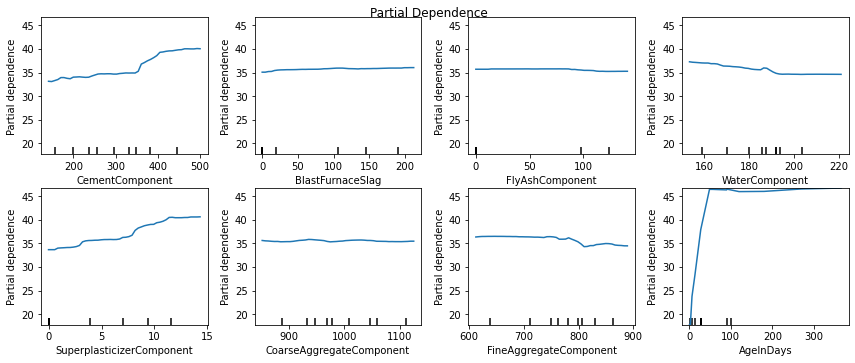

Wall time: 28.8 s


In [20]:
%%time
from sklearn.inspection import plot_partial_dependence

model = RandomForestRegressor(n_estimators=300, min_samples_leaf=30, random_state=1)
model.fit(train[original_features], train[target])

features_for_pdp = original_features
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
plt.suptitle('Partial Dependence', y=1.0)
plot_partial_dependence(model, train[original_features], features_for_pdp, n_jobs=-1, grid_resolution=50, ax=axs.ravel()[:len(features_for_pdp)])
plt.tight_layout(h_pad=0.3, w_pad=0.5)
plt.show()

### Creating the most important feature

If we clip the age to 40 days and the water to 195 units, the linear model's RMSE improves massively to 12.253.

In [21]:
for df in [train, test]:
    df['clippedAge'] = df.AgeInDays.clip(None, 40)
    
score_model(model=make_pipeline(StandardScaler(), Ridge(70)),
            features_used=original_features + ['hasBlastFurnaceSlag', 
                                               'hasFlyAshComponent', 
                                               'hasSuperplasticizerComponent',
                                               'clippedAge'])

for df in [train, test]:
    df['clippedWater'] = df.WaterComponent.clip(195, None)
    
score_model(model=make_pipeline(StandardScaler(), Ridge(30)),
            features_used=test.columns)

Fold 0: trmse = 12.300   rmse = 12.026
Fold 1: trmse = 12.240   rmse = 12.251
Fold 2: trmse = 12.286   rmse = 12.052
Fold 3: trmse = 12.292   rmse = 12.039
Fold 4: trmse = 12.054   rmse = 12.995
Average rmse: 12.272
Fold 0: trmse = 12.274   rmse = 12.011
Fold 1: trmse = 12.219   rmse = 12.221
Fold 2: trmse = 12.269   rmse = 12.015
Fold 3: trmse = 12.265   rmse = 12.042
Fold 4: trmse = 12.027   rmse = 12.980
Average rmse: 12.253


The code above first adds a new column `clippedAge` to both the `train` and `test` dataframes by clipping the `AgeInDays` column between 0 and 40. This is done using the `.clip()` method of the `pandas` library, which limits the values of the specified column within the given range.

Next, the `score_model()` function is called with the `model` argument set to a pipeline object that includes a `StandardScaler()` and a `Ridge()` model with `alpha=70`. The `features_used` argument is set to the `original_features` list, which is the list of original features used for training the model, along with the newly added `clippedAge` column and three other columns related to concrete components - `hasBlastFurnaceSlag`, `hasFlyAshComponent`, and `hasSuperplasticizerComponent`. 

The `score_model()` function then performs cross-validation using the specified model and features and prints the average root-mean-squared error (RMSE) of the model. The cross-validation is done using the `KFold()` method from the `sklearn.model_selection` module, which splits the data into several folds and trains the model on each fold while using the other folds for validation.

After the first call to `score_model()`, the code adds another new column `clippedWater` to both the `train` and `test` dataframes by clipping the `WaterComponent` column between 195 and the maximum value. The `score_model()` function is then called again with the `model` argument set to a pipeline object that includes a `StandardScaler()` and a `Ridge()` model with `alpha=30`. The `features_used` argument is set to all columns in the `test` dataframe, which includes the newly added `clippedWater` column in addition to the other original features.

Overall, this code adds new columns to the `train` and `test` dataframes by clipping the values of certain columns. It then uses the `score_model()` function to perform cross-validation on two different pipelines, each including a `StandardScaler()` and a `Ridge()` model with different hyperparameters, and prints the average RMSE of the model. The purpose of clipping the columns is to limit the effect of outliers on the model's performance. The purpose of the cross-validation is to evaluate the performance of the model on different subsets of the data to avoid overfitting.

Removing the fly ash improves the ridge regression model to 12.250:

In [22]:
ridge_features = ['CementComponent', 'BlastFurnaceSlag', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays', 'hasBlastFurnaceSlag', 'hasSuperplasticizerComponent', 'clippedAge', 'clippedWater']
score_model(model=make_pipeline(StandardScaler(), Ridge(30)),
            features_used=ridge_features,
            label='Ridge')

Fold 0: trmse = 12.277   rmse = 12.015
Fold 1: trmse = 12.221   rmse = 12.225
Fold 2: trmse = 12.274   rmse = 12.006
Fold 3: trmse = 12.269   rmse = 12.039
Fold 4: trmse = 12.034   rmse = 12.963
Average rmse: 12.250


### Gaussian process regression

The three most important features according to the partial dependency plots are `['CementComponent', 'SuperplasticizerComponent', 'AgeInDays']`. We fit a Gaussian process to these features and get a better RMSE than from ridge regression:

In [23]:
%%time
gp_features = ['CementComponent', 'SuperplasticizerComponent', 'AgeInDays']
kernel = kernels.RBF(length_scale=[1] * (len(gp_features)-1) + [0.07], length_scale_bounds=(0.01, 10)) + kernels.WhiteKernel(0.55)
score_model(model=make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=kernel, normalize_y=True, random_state=1)),
            features_used=gp_features,
            label='Gaussian Process') 

Kernel: RBF(length_scale=[6.02, 4.96, 0.0702]) + WhiteKernel(noise_level=0.549)
Fold 0: trmse = 12.130   rmse = 12.052
Kernel: RBF(length_scale=[6.79, 4.7, 0.0733]) + WhiteKernel(noise_level=0.55)
Fold 1: trmse = 12.103   rmse = 12.132
Kernel: RBF(length_scale=[6.6, 4.76, 0.0932]) + WhiteKernel(noise_level=0.545)
Fold 2: trmse = 12.170   rmse = 11.878
Kernel: RBF(length_scale=[5.29, 5.16, 0.0703]) + WhiteKernel(noise_level=0.551)
Fold 3: trmse = 12.148   rmse = 11.957
Kernel: RBF(length_scale=[6.16, 4.44, 0.0701]) + WhiteKernel(noise_level=0.543)
Fold 4: trmse = 11.865   rmse = 13.026
Average rmse: 12.209
Wall time: 12min 14s


The code above first initializes the `gp_features` variable with a list of three features - `CementComponent`, `SuperplasticizerComponent`, and `AgeInDays`. These features will be used to train a Gaussian process regression model. 

Next, the code creates a kernel object for the Gaussian process regression model using the `kernels.RBF()` and `kernels.WhiteKernel()` classes from the `sklearn.gaussian_process.kernels` module. The RBF kernel is a radial basis function kernel that is used to measure the similarity between data points. The `length_scale` parameter is set to a list of ones with a length equal to the number of features minus one (i.e., 2) and a final value of 0.07. This sets the initial length scale of the kernel for each feature and allows the kernel to learn the optimal length scale during training. The `length_scale_bounds` parameter constrains the length scale values to be between 0.01 and 10. The white kernel is used to add noise to the model and prevent numerical errors.

After creating the kernel object, the `score_model()` function is called with the `model` argument set to a pipeline object that includes a `StandardScaler()` and a `GaussianProcessRegressor()` model with the previously created kernel object, `normalize_y=True`, and `random_state=1`. The `features_used` argument is set to the `gp_features` list, and the `label` argument is set to `'Gaussian Process'`.

The `score_model()` function then performs cross-validation using the specified model and features and prints the average root-mean-squared error (RMSE) of the model. The cross-validation is done using the `KFold()` method from the `sklearn.model_selection` module, which splits the data into several folds and trains the model on each fold while using the other folds for validation.

Overall, this code trains a Gaussian process regression model with a radial basis function kernel and a white kernel to add noise. The purpose of the Gaussian process regression model is to model the underlying function that generates the data points and make predictions based on that model. The purpose of the cross-validation is to evaluate the performance of the model on different subsets of the data to avoid overfitting.

### Gradient boosting

Gradient boosting is a little better than the random forest (12.100 vs. 12.129). It is the best single model.

The following code first initializes the `gbr_params` variable with a dictionary of hyperparameters for the Gradient Boosting Regressor model. The hyperparameters include `n_estimators` set to 550, which specifies the number of boosting stages to perform, `max_depth` set to 4, which sets the maximum depth of the individual regression estimators, `learning_rate` set to 0.01, which scales the contribution of each tree, `min_samples_leaf` set to 30, which sets the minimum number of samples required to be at a leaf node, and `max_features` set to 3, which sets the maximum number of features to consider when splitting a node.

Next, the `score_model()` function is called with the `model` argument set to a Gradient Boosting Regressor model with the hyperparameters specified in the `gbr_params` dictionary. The `features_used` argument is set to the `original_features` list, which is the list of original features used for training the model. The `label` argument is set to `'GradientBoostingRegressor'`, which will be used to store the results of the cross-validation in a global `result_list` variable.

The `score_model()` function then performs cross-validation using the specified model and features and prints the average root-mean-squared error (RMSE) of the model. The cross-validation is done using the `KFold()` method from the `sklearn.model_selection` module, which splits the data into several folds and trains the model on each fold while using the other folds for validation.

Overall, this code trains a Gradient Boosting Regressor model with specified hyperparameters and evaluates its performance using cross-validation. The purpose of the Gradient Boosting Regressor model is to improve the accuracy of predictions by combining the outputs of multiple weak estimators. The purpose of the cross-validation is to evaluate the performance of the model on different subsets of the data to avoid overfitting.

In [24]:
gbr_params = {'n_estimators': 550,
              'max_depth': 4,
              'learning_rate': 0.01,
              'min_samples_leaf': 30 ,
              'max_features': 3}
score_model(model=GradientBoostingRegressor(**gbr_params, random_state=1),
            features_used=original_features,
            label='GradientBoostingRegressor')

Fold 0: trmse = 11.635   rmse = 11.861
Fold 1: trmse = 11.559   rmse = 12.053
Fold 2: trmse = 11.631   rmse = 11.807
Fold 3: trmse = 11.628   rmse = 11.930
Fold 4: trmse = 11.392   rmse = 12.849
Average rmse: 12.100


### Ensemble

We blend the four models:
- `GradientBoostingRegressor`
- Random forest
- Gaussian process using only three features
- Ridge regression with the clipped age feature

The code below first creates an ensemble model using the Voting Regressor method from the `sklearn.ensemble` module. The ensemble model aggregates the predictions of four different models - Gradient Boosting Regressor, Random Forest Regressor, Gaussian Process Regressor, and Ridge Regression - to improve the accuracy of the overall predictions. 

Each of the four models is included in the ensemble as a tuple of two elements - a string label and a pipeline object that includes a `ColumnTransformer()` and the corresponding regression model. The `ColumnTransformer()` is used to apply different data transformations to different columns of the dataset. The `GradientBoostingRegressor()` and `RandomForestRegressor()` models use the `original_features` list as predictors, while the `GaussianProcessRegressor()` uses the `gp_features` list and the `Ridge()` model uses the `ridge_features` list. 

The `weights` parameter is used to specify the weight of each model in the final prediction. The ensemble model assigns a weight of 0.4 to the Gradient Boosting Regressor, 0.3 to the Random Forest Regressor, 0.2 to the Gaussian Process Regressor, and 0.1 to the Ridge Regression.

After creating the ensemble model, the `score_model()` function is called with the `model` argument set to the ensemble model, the `features_used` argument set to all columns in the `test` dataframe, and the `label` argument set to `'GradientBoostingRegressor + RF + GP + Ridge'`.

The `score_model()` function then performs cross-validation using the specified ensemble model and prints the average root-mean-squared error (RMSE) of the model. The cross-validation is done using the `KFold()` method from the `sklearn.model_selection` module, which splits the data into several folds and trains the model on each fold while using the other folds for validation.

Overall, this code creates an ensemble model that combines the predictions of four different regression models with different hyperparameters and data transformations to improve the accuracy of the overall predictions. The purpose of the ensemble model is to reduce the bias and variance of the predictions and achieve better generalization performance. The purpose of the cross-validation is to evaluate the performance of the ensemble model on different subsets of the data to avoid overfitting.

In [25]:
ensemble_model = VotingRegressor(
    [('gb', make_pipeline(ColumnTransformer([('pt', 'passthrough', original_features)]),
                          GradientBoostingRegressor(**gbr_params, random_state=1))),
     ('rf', make_pipeline(ColumnTransformer([('pt', 'passthrough', original_features)]),
                          RandomForestRegressor(n_estimators=300, min_samples_leaf=30,
                                                random_state=1))),
     ('gp', make_pipeline(ColumnTransformer([('pt', 'passthrough', gp_features)]),
                          StandardScaler(),
                          GaussianProcessRegressor(kernel=kernel, normalize_y=True,
                                                   random_state=1))),
     ('ridge', make_pipeline(ColumnTransformer([('pt', 'passthrough', ridge_features)]),
                             StandardScaler(),
                             Ridge(30))),
    ],
    weights=[0.4, 0.3, 0.2, 0.1])
score_model(model=ensemble_model,
            features_used=test.columns,
            label='GradientBoostingRegressor + RF + GP + Ridge')

Fold 0: trmse = 11.707   rmse = 11.828
Fold 1: trmse = 11.631   rmse = 12.031
Fold 2: trmse = 11.704   rmse = 11.778
Fold 3: trmse = 11.696   rmse = 11.863
Fold 4: trmse = 11.452   rmse = 12.839
Average rmse: 12.068


### Comparing the results:

Here we compare the results of the five models that we have tried so far.

,label,rmse
4,GradientBoostingRegressor + RF + GP + Ridge,12.068
3,GradientBoostingRegressor,12.100
0,Random Forest,12.129
2,Gaussian Process,12.209
1,Ridge,12.250


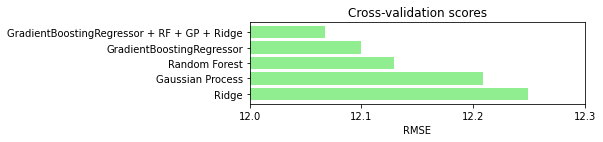

In [26]:
result_df = pd.DataFrame(result_list, columns=['label', 'rmse', 'oof'])
result_df.drop_duplicates(subset='label', keep='last', inplace=True)
result_df.sort_values('rmse', inplace=True)
with pd.option_context("precision", 3):
    display(result_df[['label', 'rmse']])
plt.figure(figsize=(6, len(result_df) * 0.3))
plt.title('Cross-validation scores')
plt.barh(np.arange(len(result_df)), result_df.rmse, color='lightgreen')
plt.gca().invert_yaxis()
plt.yticks(np.arange(len(result_df)), result_df.label)
plt.xticks(np.linspace(12, 12.3, 4))
plt.xlabel('RMSE')
plt.xlim(12, 12.3)

plt.show()

The above code creates a pandas DataFrame named `result_df` from the list of results in `result_list`. The DataFrame has three columns: 'label', 'rmse', and 'oof'. 'label' contains the names of the models, 'rmse' contains the root mean squared error scores for each model, and 'oof' contains the out-of-fold predictions for each model. The `drop_duplicates()` method removes any duplicate entries in the DataFrame and keeps only the last occurrence. The `sort_values()` method sorts the DataFrame by the 'rmse' column. The `with pd.option_context("precision", 3)` statement sets the display precision of pandas to three decimal places. The `display()` function is then used to print out the 'label' and 'rmse' columns of the DataFrame. 

The remaining lines of code create a horizontal bar plot of the RMSE scores for each model. The `plt.figure()` method sets the size of the plot, while the `plt.title()` method sets the title of the plot. The `plt.barh()` method creates the horizontal bar chart, with each bar representing the RMSE score of each model. The `plt.gca().invert_yaxis()` method inverts the y-axis to have the models displayed from top to bottom in order of RMSE scores. The `plt.yticks()` method sets the y-tick labels, while the `plt.xticks()` method sets the x-tick labels. Finally, the `plt.xlabel()` method sets the label for the x-axis, and the `plt.xlim()` method sets the limits of the x-axis to be between 12 and 12.3. Overall, this code generates a summary plot of the RMSE scores for each model, allowing for easy comparison and selection of the best-performing model.

## Final Prediction:

I will use the Ensemble model for the final prediction.

In [27]:
ensemble_model.fit(train[test.columns], train[target])
y_pred = ensemble_model.predict(test[test.columns])
pd.Series(y_pred, index=test.index, name=target).to_csv(f"submission.csv")
y_pred.round(1)

array([48.9, 20.1, 34.1, 47.9, 32.7, ..., 33.6, 36.6, 39.9, 30.6, 21.4])